In [1]:
import predict_model

In [2]:
classifier = predict_model.DangerousDrivingClassifier('model_weights')

In [3]:
# Notes to evaluators: pass in directory containing the hold-out test set
output = classifier.predict("benchmark/bm_tele.csv")

... (0/5) reading data ... 
... (1/5) cleaning data ... 
... (2/5) transforming data ... 
... (3/5) generating feature (Type 1: Statistical Description) ... 
... (4/5) generating feature (Type 2: Counting Outlying Behaviours) ... 
... (5/5) generating feature (Type 3: Sliding Window) ... 
    (WARNING! This process may take up many RAM memory. Please allocate enough memory.)
    Side Note: This may take awhile, please be patient. :)
Done!


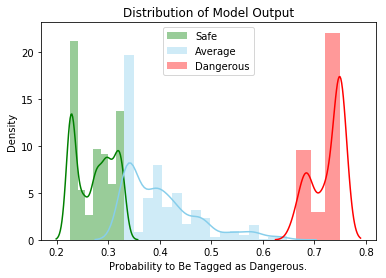

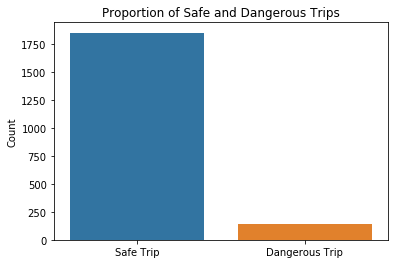

In [4]:
classifier.generate_report()

***

### Compute ROC

In [5]:
import pandas as pd
from sklearn import metrics

In [6]:
# Notes to evaluators: pass in the actual directory containing true labels
true_labels = pd.read_csv("data/ori_labels.csv", dtype={'bookingID': 'object'})

In [7]:
# label the booking_id with true labels
annotated_output = pd.merge(output, true_labels, on='bookingID', suffixes=('_pred', '_true'))
annotated_output.head()

,bookingID,prob,label_pred,label_true
0,16,0.275293,0,0
1,18,0.332429,0,1
2,34,0.268342,0,0
3,50,0.329085,0,0
4,96,0.407255,0,0


In [10]:
# roc score
print("ROC Score:", metrics.roc_auc_score(annotated_output['label_true'], annotated_output['prob']))
print("Accuracy Score:", metrics.accuracy_score(annotated_output['label_true'], annotated_output['label_pred']))

ROC Score: 0.7513326639892906
Accuracy Score: 0.7852852852852853
